In [12]:
import popsims
import numpy as np
import pandas as pd
import splat
import popsims
from astropy.coordinates import SkyCoord, Galactic
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#sns.set_style("darkgrid", {"axes.facecolor": ".95"})

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

from  matplotlib.colors import Normalize
import astropy.units as u
import popsims
import matplotlib
from tqdm import tqdm
from tqdm import tqdm
import matplotlib as mpl 
from popsims.abs_mags import get_abs_mag
mpl.rcParams['figure.titlesize'] = 20

splat.initializeStandards(all=True)

%matplotlib inline

In [13]:
def group_by_spt(spts, values, grid= np.arange(15, 41)):
    res=np.ones_like(grid)*np.nan
    std=np.ones_like(grid)*np.nan
    mres=np.ones_like(grid)*np.nan
    for idx, g in enumerate(grid):
        if idx < len(grid)-1:
            bools=np.logical_and(spts>=grid[idx], spts<grid[idx+1])
        else:
            bools=spts>=grid[-1]
        np.place(res, grid==[grid[idx]], np.nanmedian(values[bools]) )
        np.place(mres, grid==[grid[idx]], np.nanmean(values[bools]) )
        np.place(std, grid==[grid[idx]], np.nanstd(values[bools]))
    return {'grid': grid, 'median': res, 'std': std, 'mean': mres}

In [14]:
def teff_from_spt(spt):
    rel=splat.SPT_TEFF_RELATIONS['pecaut']
    spt_sorted_idx=np.argsort(rel['values'])

    teff=np.interp(spt, np.array(rel['spt'])[spt_sorted_idx],  np.array(rel['values'])[spt_sorted_idx])
    return np.random.normal(teff, 108)


In [15]:
x=np.ones(int(1e6))*20

In [16]:
%%prun 
np.random.normal(x, 0.5)

In [17]:
%%prun 
np.random.normal(x, x)

In [18]:
import wisps.simulations as wispsim

In [19]:
import wisps.simulations.effective_numbers as eff

In [21]:
#eff.get_all_values_from_model('burrows2001', [100, 150])

100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


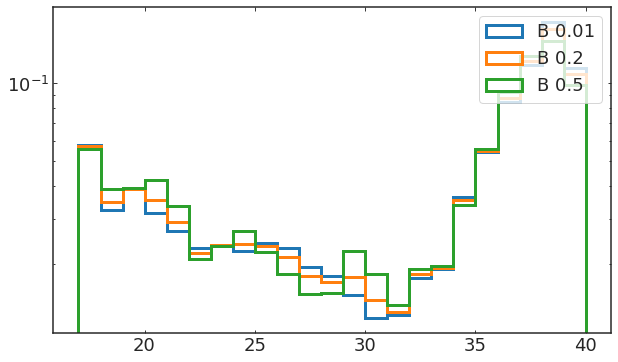

In [22]:
fig, ax=plt.subplots(figsize=(10, 6))
for b_fraction in tqdm([0.01, 0.2, 0.5]):
    vals=popsims.make_systems(bfraction=b_fraction)
    h=plt.hist(vals['spt'], density=True,  range=[17, 40], \
           histtype='step', bins=23, lw=3,  log=True, label=r'B {}'.format(b_fraction))
ax.legend()


In [23]:
#hjk

In [24]:
vals=popsims.make_systems(bfraction=0.2)

In [25]:
#mass functuin and mass ratio distributin

In [26]:
#

[Text(0.5, 0, 'Mass Ratio')]

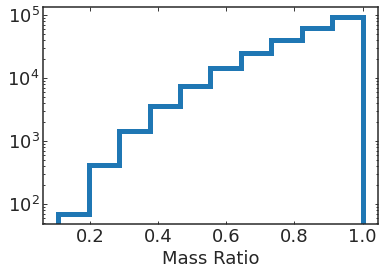

In [27]:
fig, ax=plt.subplots()
h=plt.hist(vals.sec_mass/vals.pri_mass,  histtype='step', lw=5,  log=True)
ax.set(xlabel='Mass Ratio')

In [28]:
#fig, 

[Text(0.5, 0, 'SpT ')]

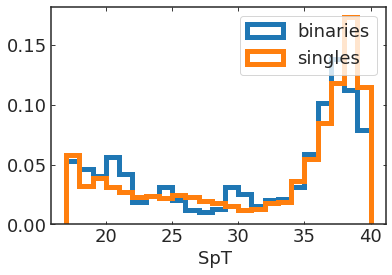

In [29]:
fig, ax=plt.subplots()
h=plt.hist(vals['spt'][vals.is_binary], density=True,  range=[17, 40], \
           histtype='step', bins=23, lw=5,  label='binaries')
h=plt.hist(vals['spt'][~vals.is_binary], bins=23, density=True, range=[17, 40], histtype='step', lw=5,\
          label='singles')
ax.legend()
ax.set(xlabel='SpT ')

[Text(0.5, 0, 'Teff'), (400.0, 3000.0)]

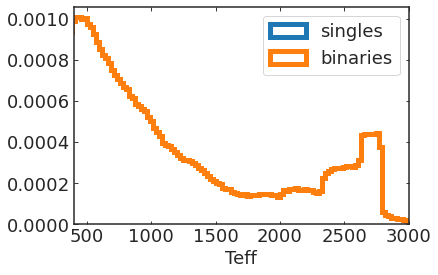

In [30]:
fig, ax=plt.subplots()
h=plt.hist(vals['temperature'][vals.is_binary], density=True,  \
           histtype='step', bins='auto', lw=5, range=[200, 3000], label='singles')
h=plt.hist(vals['temperature'][~vals.is_binary],bins='auto', range=[200, 3000] , density=True, histtype='step', lw=5,\
          label='binaries')
ax.legend()
ax.set(xlabel='Teff', xlim=[400, 3000])

In [31]:
spgrid=np.append([np.nan, np.nan], np.arange(15, 41))

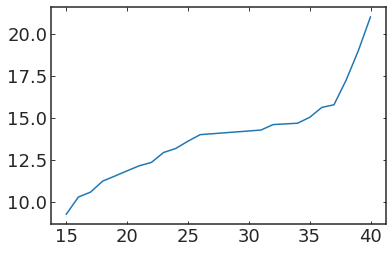

In [32]:
plt.plot(spgrid, popsims.abs_mags.make_mamajek_fit(spgrid)[0][0])

[Text(0, 0.5, 'Teff'), Text(0.5, 0, 'SpT')]

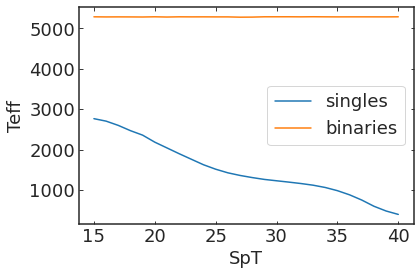

In [34]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.spt[~vals.is_binary],vals.temperature[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.temperature[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles')
ax.errorbar(bins['grid'], bins['median'],  label='binaries')
ax.legend()
ax.set(ylabel='Teff', xlabel='SpT')

In [48]:
def teff_from_spt(spt):
    rel=splat.SPT_TEFF_RELATIONS['pecaut']
    #spt_sorted_idx=np.argsort(rel['values'])

    teff=np.interp(spt,    np.array(rel['spt']), np.array(rel['values']))
    return np.random.normal(teff, 108)

In [50]:
 teff_from_spt(20)

2384.7794939219457

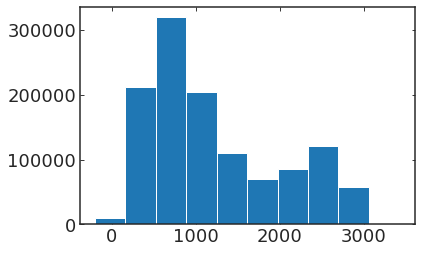

In [52]:
h=plt.hist(teff_from_spt(vals.spt))

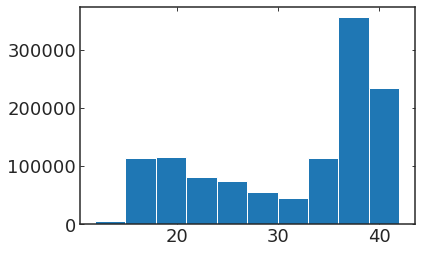

In [53]:
h=plt.hist(popsims.teff_to_spt(teff_from_spt(vals.spt)))

In [35]:
binaries=vals[vals.is_binary]

In [37]:
binaries.temperature

0         5519.279864
1         5427.717644
2         5301.574523
3         5370.649411
4         5291.111370
             ...     
249995            NaN
249996    5264.385855
249997            NaN
249998    5172.490873
249999    5423.611547
Name: temperature, Length: 250000, dtype: float64

In [ ]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.abs_2MASS_H[~vals.is_binary],vals.temperature[~vals.is_binary])
bins=group_by_spt(vals.abs_2MASS_H[vals.is_binary], vals.temperature[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles (Evol Models) ')
ax.errorbar(bins['grid'], bins['median'],  label='binaries')
ax.plot(np.arange(15,25), popsims.get_teff_from_mag_ignore_unc(np.arange(15, 25)), label='Relation')
ax.legend()
ax.set(ylabel='Teff', xlabel='H mag')

In [ ]:
#binaries.prim_spt

In [ ]:
js=-2.5*np.log10(10**(-0.4*popsims.get_abs_mag(binaries['prim_spt'],'2MASS J')[0])+\
        10**(-0.4*popsims.get_abs_mag(binaries['sec_spt'],'2MASS J')[0]))

In [ ]:
plt.hist(np.nan_to_num(js), range=[0, 15], log=True)

In [ ]:
js_primns, junc_prims=popsims.get_abs_mag(vals['prim_spt'], '2MASS J')
js_prims_to_use=np.random.normal(js_primns, junc_prims)

hs_primns, hunc_prims=popsims.get_abs_mag(vals['prim_spt'], '2MASS H')
hs_prims_to_use=np.random.normal(hs_primns, junc_prims)

js_secs, junc_secs=popsims.get_abs_mag(vals['sec_spt'], '2MASS J')
js_secs_to_use=np.random.normal(js_secs, junc_secs)


In [ ]:
h=plt.hist(vals['prim_spt'])

In [ ]:
fig, ax=plt.subplots()
plt.scatter(popsims.dropnans(vals['prim_spt'].values), \
         popsims.dropnans(popsims.abs_mags.BEST['2MASS J'][1](popsims.dropnans(vals['prim_spt'].values))),\
           s=1)
#plt.scatter( vals['prim_spt'].values,  js_prims_to_use, s=1)

In [ ]:
#popsims.abs_mags.

In [ ]:
 len(popsims.dropnans(hs_prims_to_use)), len(popsims.dropnans(vals['prim_spt'].values))

In [ ]:
fig, ax=plt.subplots()
ax.scatter(binaries.prim_spt, binaries.sec_spt, c=binaries['abs_2MASS_J'], s=1, 
           vmin=9, vmax=25, cmap='cubehelix')

In [ ]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.spt[~vals.is_binary],vals.luminosity[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.luminosity[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], yerr=sings['std'], label='singles')
ax.errorbar(bins['grid'], bins['median'], yerr=bins['std'], label='binaries')

ax.set(ylabel='Log Luminosity', xlabel='SpT')
ax.legend()
ax.minorticks_on()

In [ ]:
np.nanmedian(-2.5*np.log10((10**sings['median']) /(10**bins['median'])))

In [ ]:
get_abs_mag(vals.spt, '2MASS H')[0]

In [ ]:
fig, ax=plt.subplots()
hx=plt.hist(vals.abs_2MASS_H.values, log=True, histtype='step', lw=5)
hxy=plt.hist(vals.abs_2MASS_J.values, log=True, histtype='step', lw=5)

In [ ]:
popsims

In [ ]:
fig, ax=plt.subplots()

sings=group_by_spt(vals.spt[~vals.is_binary],vals.abs_2MASS_J[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.abs_2MASS_J[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles')
ax.errorbar(bins['grid'], bins['median'], label='binaries')
#ax.plot(bins['grid'], get_abs_mag(bins['grid'],'2MASS J')[0], label='pecaut')

ax.set(ylabel='Abs J', xlabel='SpT')
ax.legend()
ax.minorticks_on()



In [ ]:
spts=np.arange(15, 41)

In [ ]:
np.place(spts, spts>=36, np.ones_like(spts[spts>=36]))

In [ ]:
 popsims.abs_mags.absolute_mag_kirkpatrick(spts[spts>=36], '2MASS H')[0]

In [ ]:
fig, ax=plt.subplots()

sings=group_by_spt(vals.spt[~vals.is_binary],vals.abs_2MASS_H[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.abs_2MASS_H[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles')
ax.errorbar(bins['grid'], bins['median'], label='binaries')
#ax.plot(bins['grid'], get_abs_mag(bins['grid'],'2MASS H'), label='pecaut')

ax.set(ylabel='Abs H', xlabel='SpT')
ax.legend()
ax.minorticks_on()


In [ ]:
plt.hist(vals.abs_2MASS_H[~vals.is_binary])

In [ ]:
np.nanmedian(sings['median']-(bins['median']))

In [ ]:
popsims.get_mag_from_luminosity(3, 2, log=True)-popsims.get_mag_from_luminosity(2*3, 2, log=True)

In [ ]:
4.74+0.65

In [ ]:
#hbjk

In [ ]:
fig, ax=plt.subplots()
h=plt.scatter(vals.sec_mass/vals.pri_mass, \
              -2.5*np.log10(10**vals.luminosity/vals.prim_luminosity), s=1, \
              c=np.log10(vals.age),
              alpha=0.01, cmap='cividis')
ax.set(xlabel='Mass ratio', ylabel=' Log Luminosity (system/primary)')

In [ ]:
@np.vectorize      
def splat_teff_from_spt(spt):
    rel=splat.SPT_TEFF_RELATIONS['pecaut']
    #spt_sorted_idx=np.argsort(rel['values'])

    teff=np.interp(spt, np.array(rel['spt']),  np.array(rel['values']))
    return np.random.normal(teff, 108)

In [ ]:
spgrid=np.random.uniform(10, 41, 10000)
plt.scatter(spgrid, splat_teff_from_spt(spgrid), s=1.)


In [ ]:
ghjk

In [ ]:
#plt.scatter(vals['spt'],\
#         popsims.fillipazzo_bolometric_correction(vals['spt'].values, \
 #                                                 filt='2MASS_J', mask=vals['spt']>39),
 #        s=1, alpha=0.01)


In [ ]:
#-2.5*np.log10(10**vals.luminosity/vals.prim_luminosity)

In [ ]:
def get_distances(spts):
    return pd.Series({'distanc': np.random.uniform(0, 10, len(spts)),
                     'lol': np.random.uniform(0, 10, len(spts))})

In [ ]:
h=350
model='baraffe2003'

In [ ]:
str(model)+str(h)+str(h)+'F110_corrected'

In [ ]:
data_bins=pd.read_hdf(popsims.DATA_FOLDER+'/final_simulated_sample_cut_binaries.h5',\
                      key=str(model)+str(h)+str('spt_abs_mag'))
data=pd.read_hdf(popsims.DATA_FOLDER+'/final_simulated_sample_cut.h5', key=str(model)+str('h')+str(h)+'F110_corrected')

In [ ]:
fig, (ax, ax1)=plt.subplots(figsize=(12, 6), ncols=2, sharey=True)


ax.scatter(data_bins['spt'][~data_bins.is_cut.values], 
           np.log10(data_bins['snrj'])[~data_bins.is_cut.values],
           c=data_bins['slprob'][~data_bins.is_cut.values], 
           alpha=0.1, s=1, cmap='cividis')

ax1.scatter(data['spt'], np.log10(data['snr']), c=data['sl'], 
           alpha=0.1, s=1, cmap='cividis')

In [ ]:
#count the number of stars
len(vals[vals.is_binary])/len(vals[~vals.is_binary])

In [ ]:
fig, ax=plt.subplots()
h=plt.hist(data['spt'].values, bins=23, histtype='step', lw=3, density=True, label='Old')
h=plt.hist(data_bins['spt'][~data_bins.is_cut.values].values, bins=23,\
           histtype='step', lw=3, label='New', density=True)
plt.legend()
ax.set(xlabel='Spectral Type')

In [ ]:
#compare number counts
nobins=pd.read_pickle(popsims.DATA_FOLDER+'/expected_numbers_wisps_no_binaries.pkl')
plusbins=pd.read_pickle(popsims.DATA_FOLDER+'/expected_numbers_wisps_plus_binaries.pkl')

In [ ]:
spgrid=[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]

In [ ]:
fig, ax=plt.subplots()
ax.step(spgrid, np.array(nobins['densities'][model][5])[:,0]*nobins['volumes'][5], \
        label='Old')
ax.step(spgrid, np.array(plusbins['densities'][model][5])[:,0]*plusbins['volumes'][5], \
        label='New')
#ax.errorbar(spgrid, plusbins['nobs'], yerr= plusbins['nobs']**0.5, c='k', fmt='o')
ax.legend()
ax.set(yscale='log', xlabel='SpT',ylabel='Counts')

In [ ]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    h=a.hist(data['app{}'.format(mag_key.lower())].values, bins='auto', histtype='step', lw=3, density=True, label='Old')
    h=a.hist(data_bins['app{}'.format(mag_key)][~data_bins.is_cut.values].values, bins='auto',\
               histtype='step', lw=3, label='New', density=True)
    a.legend()
    a.set(xlabel=mag_key)

In [ ]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    h=a.hist(data_bins['app{}'.format(mag_key)][(~data_bins.is_cut.values) & (~data_bins.is_binary)].values, \
             bins='auto',histtype='step', lw=3, label='Single', density=True)
    h=a.hist(data_bins['app{}'.format(mag_key)][(~data_bins.is_cut.values) & (data_bins.is_binary)].values, \
             bins='auto',histtype='step', lw=3, label='Binary', density=True)
    a.legend()
    a.set(xlabel=mag_key)

In [ ]:
data_bins.dist[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values

In [ ]:
fig, ax=plt.subplots()

h=ax.hist(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values), \
         bins='auto',  range=np.log10([10, 3000]), histtype='step', lw=3, label='Single', density=True)
h=ax.hist(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (data_bins.is_binary)].values), \
         bins='auto', range=np.log10([10, 3000]), histtype='step', lw=3, label='Binary', density=True)
ax.legend()
ax.set(xlabel='Log Distance')
plt.savefig('/users/caganze/desktop/binaries_distances.pdf')

In [ ]:
import splat.empirical as spe

In [ ]:
spe.typeToTeff(np.arange(15, 40))[0].value

In [ ]:
ax.hist2d?

In [ ]:
fig, ax=plt.subplots(figsize=(10, 6),  sharex=True, sharey=True)

h=ax.hist2d(np.log10(data_bins.dist[(~data_bins.is_cut.values) ].values).flatten(), \
             data_bins.spt[(~data_bins.is_cut.values) ].values,\
         bins=23, density=True, cmap='Blues')
#h=ax1.hist2d(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (data_bins.is_binary)].values.flatten()), \
#             data_bins.spt[(~data_bins.is_cut.values) & (data_bins.is_binary)].values,\
#         bins=23, density=True, cmap='Blues')

h=ax.scatter(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values).flatten(), \
             data_bins.spt[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values, s=15, c='k', alpha=0.1)

h=ax.scatter(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (data_bins.is_binary)].values.flatten()), \
             data_bins.spt[(~data_bins.is_cut.values) & (data_bins.is_binary)].values,\
          s=15, c='r', alpha=0.1)
ax.legend()
ax.set(xlabel='Log Distance', ylabel='Spectral Type')

In [ ]:
cut_flag=data_bins.is_cut.values
bin_flag=data_bins.is_binary.values

In [ ]:
fig, ax=plt.subplots()


ne_sing=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, ~bin_flag)], \
                 data_bins['abs_2MASS_H'][np.logical_and(~cut_flag, ~bin_flag)])

ne_bins=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, bin_flag)], \
                 data_bins['abs_2MASS_H'][np.logical_and(~cut_flag, bin_flag)])

#ax.errorbar(prev['grid'], prev['median'],  ms=1, label='Prev')
#ax.errorbar(ne['grid'], ne['median'],  ms=1, label='New')
h=ax.errorbar(ne_sing['grid'], ne_sing['median'],  \
              yerr= ne_sing['std'], ms=1, label='Singles')
h=ax.errorbar(ne_bins['grid'], ne_bins['median'],  \
              yerr= ne_sing['std'], ms=1, label='Binaries')

#ax.plot(ne_sing['grid'], ne_sing['median']-ne_bins['median'])
ax.legend()
ax.minorticks_on()

ax.legend()
ax.set(xlabel='Spectral Type', ylabel='Abs H mag')

In [ ]:
j, h=popsims.abs_mags.make_mamajek_fit(data_bins['spt'])

In [ ]:
np.random.normal(j[0], 0.4)

In [ ]:
fig, ax=plt.subplots()


ne_sing=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, ~bin_flag)], \
                 data_bins['abs_2MASS_J'][np.logical_and(~cut_flag, ~bin_flag)])

ne_bins=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, bin_flag)], \
                 data_bins['abs_2MASS_J'][np.logical_and(~cut_flag, bin_flag)])

#ax.errorbar(prev['grid'], prev['median'],  ms=1, label='Prev')
#ax.errorbar(ne['grid'], ne['median'],  ms=1, label='New')
h=ax.errorbar(ne_sing['grid'], ne_sing['median'],  \
              yerr= ne_sing['std'], ms=1, label='Singles')
h=ax.errorbar(ne_bins['grid'], ne_bins['median'],  \
              yerr= ne_sing['std'], ms=1, label='Binaries')

#ax.plot(ne_sing['grid'], ne_sing['median']-ne_bins['median'])
ax.legend()
ax.minorticks_on()

ax.legend()
ax.set(xlabel='Spectral Type', ylabel='Abs J mag')

In [ ]:
#2.5*np.log10(2)*

In [ ]:
data_bins['spt_diff']=data_bins['sec_spt']-data_bins['prim_spt']

In [ ]:
fig, ax=plt.subplots()
prev=group_by_spt(data_bins['prim_spt'],data_bins['spt_diff'])
ax.scatter(data_bins['prim_spt'],data_bins['spt_diff'], s=1, alpha=0.1)
ax.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, c='r')

ax.axhline(0, linestyle='--', c='k')
ax.set(ylabel='Primary-Secondary Types', xlabel='Primary Type')

In [ ]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    bools=np.logical_and((~data_bins.is_cut.values), (data_bins.is_binary))
    
    diff=data_bins['prim_abs{}'.format(mag_key)]-data_bins['sec_abs{}'.format(mag_key)]
    
    prev=group_by_spt(data_bins['spt'].values[bools], diff[bools])
    a.scatter(data_bins['spt'].values[bools], diff[bools], s=1)
    a.axhline(0, linestyle='--', c='k')
    h=a.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1,  c='r')
    a.set(xlabel='Primary Spectral Type', ylabel='Abs {} difference'.format(mag_key))

In [ ]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    #prev=group_by_spt(data['spt'].values, data[mag_key.lower()].values)
    ne=group_by_spt(data_bins['spt'][~(data_bins.is_cut.values) & (data_bins.is_binary)].values, \
                 data_bins['abs{}'.format(mag_key)][~(data_bins.is_cut.values) & (data_bins.is_binary)].values)
    prev=group_by_spt(data_bins['spt'][~(data_bins.is_cut.values) & (~data_bins.is_binary)].values, \
                 data_bins['abs{}'.format(mag_key)][~(data_bins.is_cut.values) & (~data_bins.is_binary)].values)
    h=a.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, label='Singles')
    h=a.errorbar(ne['grid'], ne['median'],  yerr= ne['std'], ms=1, label='Binaries')
    a.legend()
    a.set(xlabel='Spectral Type', ylabel='Abs{}'.format(mag_key))

In [ ]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    prev=group_by_spt(data['spt'].values, data[mag_key.lower()].values)
    ne=group_by_spt(data_bins['spt'][~data_bins.is_cut.values].values, \
                 data_bins['abs{}'.format(mag_key)][~data_bins.is_cut.values].values)
    h=a.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, label='Prev')
    h=a.errorbar(ne['grid'], ne['median'],  yerr= ne['std'], ms=1, label='Ne')
    a.legend()
    a.set(xlabel='Spectral Type', ylabel='Abs{}'.format(mag_key))